# Regional separation

### Importing packages

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from fatiando.vis import mpl
import pandas as pd
import matplotlib as mpb
import cPickle as pickle

/home/leonardo/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


### Observation points and observed data

In [2]:
with open('data.pickle') as w:
        data = pickle.load(w)

In [3]:
dobs = data['tfa_obs']
xp = data['x']
yp = data['y']
zp = data['z']
N = data['N']

In [4]:
xp

array([ 8981.07703745,  8868.07703745,  8757.07703745, ...,
       15702.07703745, 15806.07703745, 15911.07703745])

### Data plot

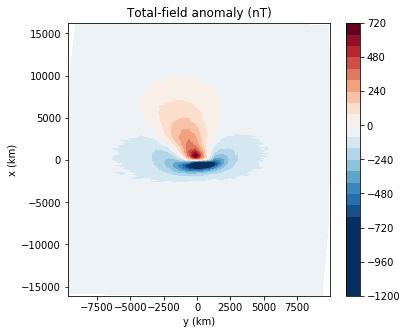

In [5]:
plt.figure(figsize=(6,5))

plt.subplot(1,1,1)
plt.title("Total-field anomaly (nT)")
#plt.axis('scaled')
norm=mpb.colors.Normalize(vmin=-np.max(dobs), vmax=np.max(dobs))
plt.tricontourf(yp, xp, dobs, 30, cmap ='RdBu_r', norm=norm)
plt.colorbar()
#plt.plot(yp, xp, 'ok', markersize=0.5)
plt.xlabel('y (km)')
plt.ylabel('x (km)')
#mpl.m2km()

plt.tight_layout(pad = 2.)

plt.show()

### Simple polynomial fitting

In [6]:
A = np.vstack((np.ones(N), xp, yp)).T

In [7]:
ATA = np.dot(A.T,A)
t = np.trace(ATA)/N
mu = 0.000001*t

In [8]:
p1 = np.linalg.solve(ATA + mu*np.identity(3),np.dot(A.T,dobs))

In [9]:
tfa_regional1 = np.dot(A,p1)

In [10]:
tfa_residual1 = dobs - tfa_regional1

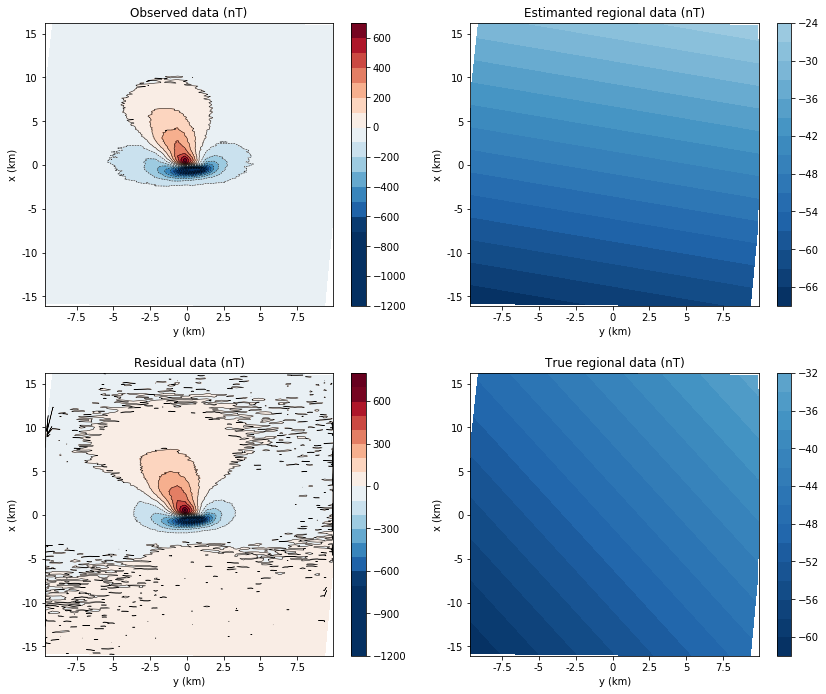

In [11]:
#plt.close('all')
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.title("Observed data (nT)")
norm=mpb.colors.Normalize(vmin=-np.max(dobs), vmax=np.max(dobs))
#plt.axis('scaled')
plt.tricontour(yp, xp, dobs, 20, colors='k', linewidths=0.5)
plt.tricontourf(yp, xp, dobs, 20, cmap = plt.get_cmap('RdBu_r'), norm=norm)
plt.colorbar()
plt.xlabel('y (km)')
plt.ylabel('x (km)')
mpl.m2km()

plt.subplot(2,2,2)
plt.title("Estimanted regional data (nT)")
#plt.axis('scaled')
norm=mpb.colors.Normalize(vmin=np.min(tfa_regional1), vmax=-np.min(tfa_regional1))
plt.tricontourf(yp, xp, tfa_regional1, 15, cmap = plt.get_cmap('RdBu_r'), norm=norm)
plt.colorbar()
plt.xlabel('y (km)')
plt.ylabel('x (km)')
mpl.m2km()

plt.subplot(2,2,3)
plt.title("Residual data (nT)")
#plt.axis('scaled')
plt.tricontour(yp, xp, tfa_residual1, 20, colors='k', linewidths=0.5)
norm=mpb.colors.Normalize(vmin=-np.max(dobs), vmax=np.max(dobs))
plt.tricontourf(yp, xp, tfa_residual1, 20, cmap = plt.get_cmap('RdBu_r'), norm=norm)
plt.colorbar()
plt.xlabel('y (km)')
plt.ylabel('x (km)')
mpl.m2km()

plt.subplot(2,2,4)
plt.title("True regional data (nT)")
#plt.axis('scaled')
norm=mpb.colors.Normalize(vmin=np.min(data['regional']), vmax=-np.min(data['regional']))
plt.tricontourf(yp, xp, data['regional'], 15, cmap = plt.get_cmap('RdBu_r'), norm=norm)
plt.colorbar()
plt.xlabel('y (km)')
plt.ylabel('x (km)')
mpl.m2km()

plt.tight_layout(pad = 2.)

plt.show()

In [12]:
data['res_data'] = tfa_residual1

In [13]:
data['est_regional'] = tfa_regional1

In [14]:
d = {'x': xp, 'y': yp, 'z': zp, 'dobs': data['tfa_obs'], 'res_data': tfa_residual1, 'regional': tfa_regional1}

In [15]:
dataset = pd.DataFrame(d)

In [16]:
mask = (dataset['y'] <= 5000.) & (dataset['y'] >= -5000.) & (dataset['x'] <= 5000.) & (dataset['x'] >= -5000.)
d2 = dataset[mask]
d2.reset_index(inplace=True)

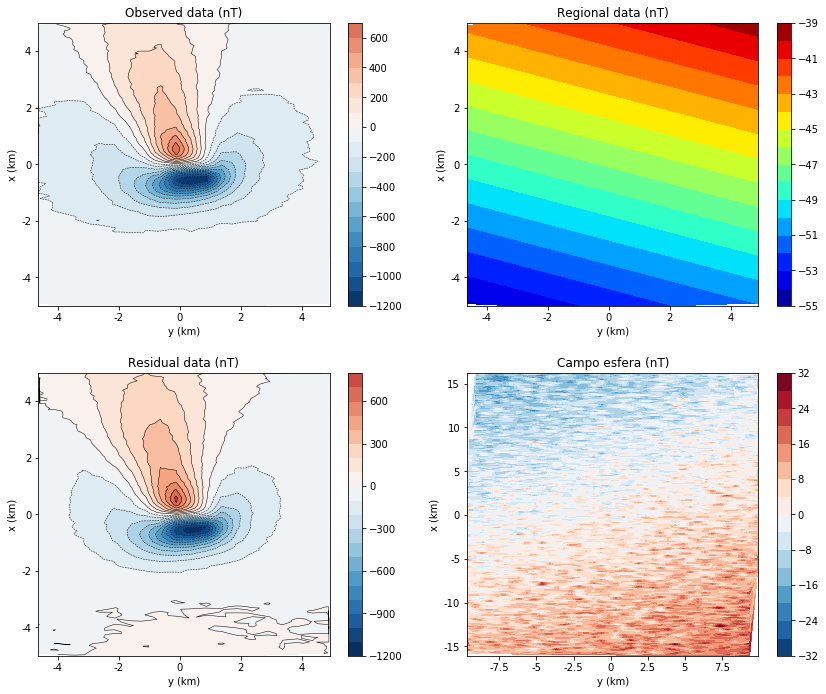

In [22]:
#plt.close('all')
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.title("Observed data (nT)")
norm=mpb.colors.Normalize(vmax=-np.min(d2['dobs']), vmin=np.min(d2['dobs']))
plt.tricontour(d2['y'], d2['x'], d2['dobs'], 20, colors='k', linewidths=0.5)
plt.tricontourf(d2['y'], d2['x'], d2['dobs'], 20, cmap ='RdBu_r', norm=norm)
plt.colorbar()
plt.xlabel('y (km)')
plt.ylabel('x (km)')
mpl.m2km()

plt.subplot(2,2,2)
plt.title("Regional data (nT)")
#plt.axis('scaled')
plt.tricontourf(d2['y'], d2['x'],d2['regional'], 15, cmap = plt.get_cmap('jet'))
plt.colorbar()
plt.xlabel('y (km)')
plt.ylabel('x (km)')
mpl.m2km()

plt.subplot(2,2,3)
plt.title("Residual data (nT)")
plt.tricontour(d2['y'], d2['x'], d2['res_data'], 20, colors='k', linewidths=0.5)
norm=mpb.colors.Normalize(vmin=np.min(tfa_residual1), vmax=-np.min(tfa_residual1))
plt.tricontourf(d2['y'], d2['x'], d2['res_data'], 20, cmap = plt.get_cmap('RdBu_r'), norm=norm)
plt.colorbar()
plt.xlabel('y (km)')
plt.ylabel('x (km)')
mpl.m2km()

plt.subplot(2,2,4)
plt.title("Campo esfera (nT)")
#plt.axis('scaled')
plt.tricontourf(data['y'], data['x'], tfa_residual1-data['tfa'], 15, cmap = plt.get_cmap('RdBu_r'))
plt.colorbar()
plt.xlabel('y (km)')
plt.ylabel('x (km)')
mpl.m2km()

plt.tight_layout(pad = 2.)

plt.show()

In [18]:
d2.to_csv('inclined_model_data.txt', sep=' ')